In [1]:
import numpy as np
import pandas as pd

In [6]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [8]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3789,ham,I love you !!! You know? Can you feel it? Does...,NaN,NaN,NaN
3551,ham,Lol u still feeling sick?,NaN,NaN,NaN
5194,ham,Ok... Take ur time n enjoy ur dinner...,NaN,NaN,NaN
4769,ham,CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...,NaN,NaN,NaN
5508,ham,"Machan you go to gym tomorrow, i wil come lat...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [11]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropping last three columns as they have non-null values

In [13]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [14]:
df.sample(5)

,v1,v2
2167,ham,Yes.he have good crickiting mind
5308,ham,I'm coming back on Thursday. Yay. Is it gonna ...
19,spam,England v Macedonia - dont miss the goals/team...
4101,ham,Ok then i will come to ur home after half an hour
1268,spam,Can U get 2 phone NOW? I wanna chat 2 set up m...


In [27]:
#renaming the cols
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [28]:
df.sample(5)

,Target,Text
2709,0,Sorry de i went to shop.
3761,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
170,0,"Sir, I need AXIS BANK account no and bank addr..."
4319,0,Hey mr and I are going to the sea view and ha...
2296,1,<Forwarded from 21870000>Hi - this is your Mai...


In [30]:
#changing ham value to 0 and spam to 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [32]:
#checking for duplicate values
df.duplicated().sum()

403

In [34]:
#removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [36]:
df.shape

(5169, 2)

## 2. EDA

In [38]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

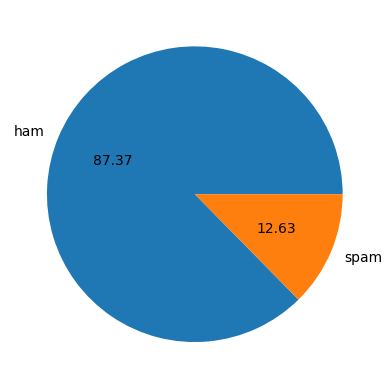

In [39]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f') #autopct to check the percen
plt.show()

Above chart shows data imbalance


In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sunil
[nltk_data]     kadam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
#displaying number of characters of each SMS
df['num_characters']= df['Text'].apply(len)
df.head()

C:\Users\sunil kadam\AppData\Local\Temp\ipykernel_22424\3313656088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['Text'].apply(len)


,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
#breaking every SMS word by word and forming a list
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [49]:
#now calculating the length of each list, hence displaying nu,ber of words used in SMS
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


C:\Users\sunil kadam\AppData\Local\Temp\ipykernel_22424\3594395327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [50]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [54]:
#finding number of sentences
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sunil kadam\AppData\Local\Temp\ipykernel_22424\1811536515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [55]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Analysing ham and spam separately

In [58]:
#ham analysis
df[df['Target']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#spam analysis
df[df['Target']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

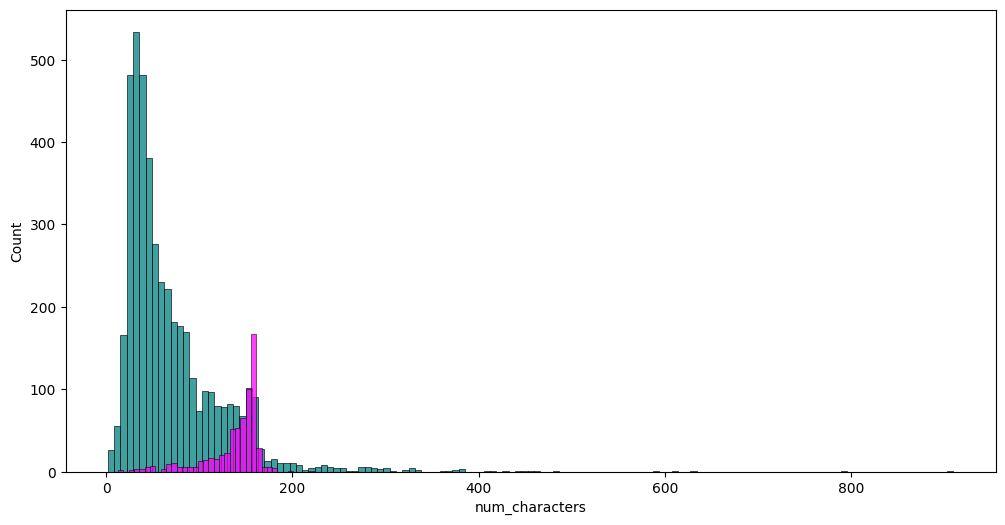

In [77]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'],color='teal')
sns.histplot(df[df['Target']==1]['num_characters'],color='fuchsia')

<Axes: xlabel='num_words', ylabel='Count'>

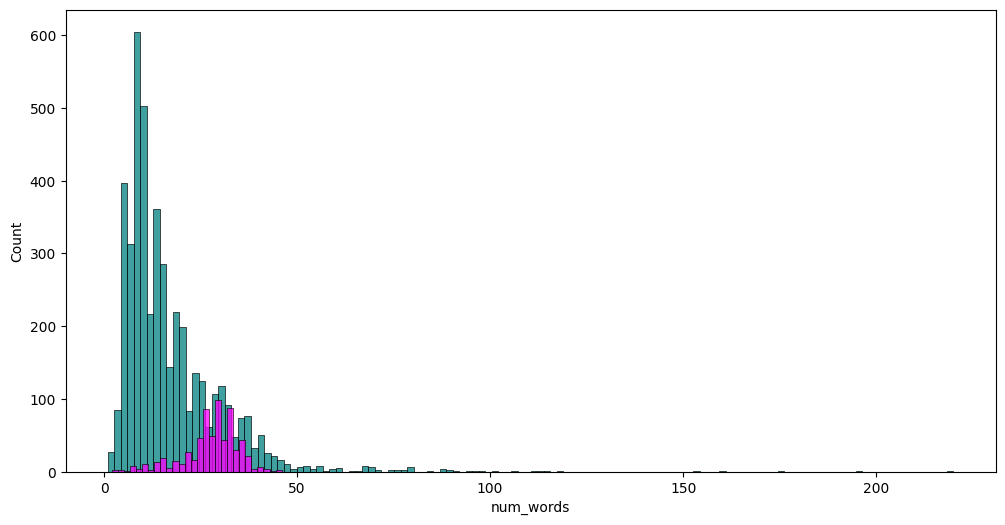

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'],color='teal')
sns.histplot(df[df['Target']==1]['num_words'],color='fuchsia')

<Axes: xlabel='num_sentences', ylabel='Count'>

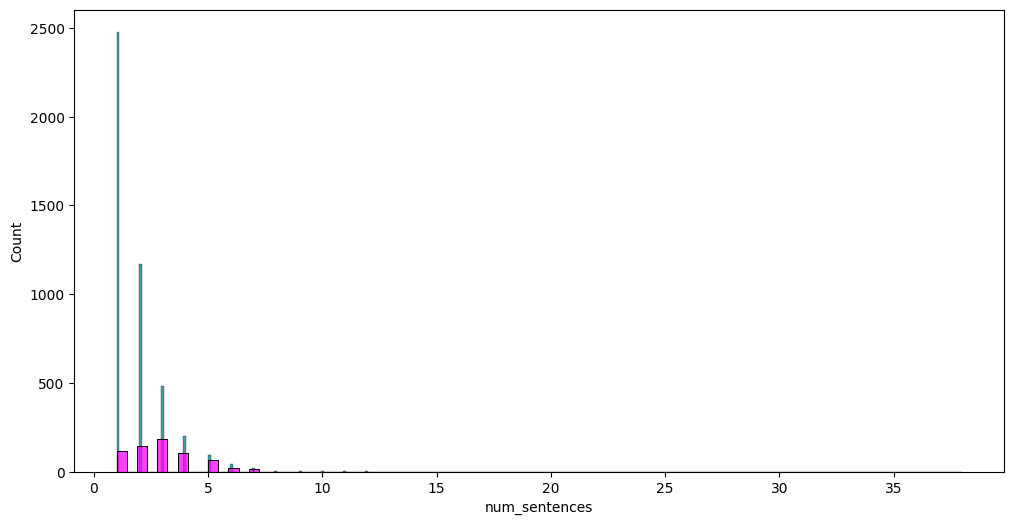

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sentences'],color='teal')
sns.histplot(df[df['Target']==1]['num_sentences'],color='fuchsia')

C:\Users\sunil kadam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


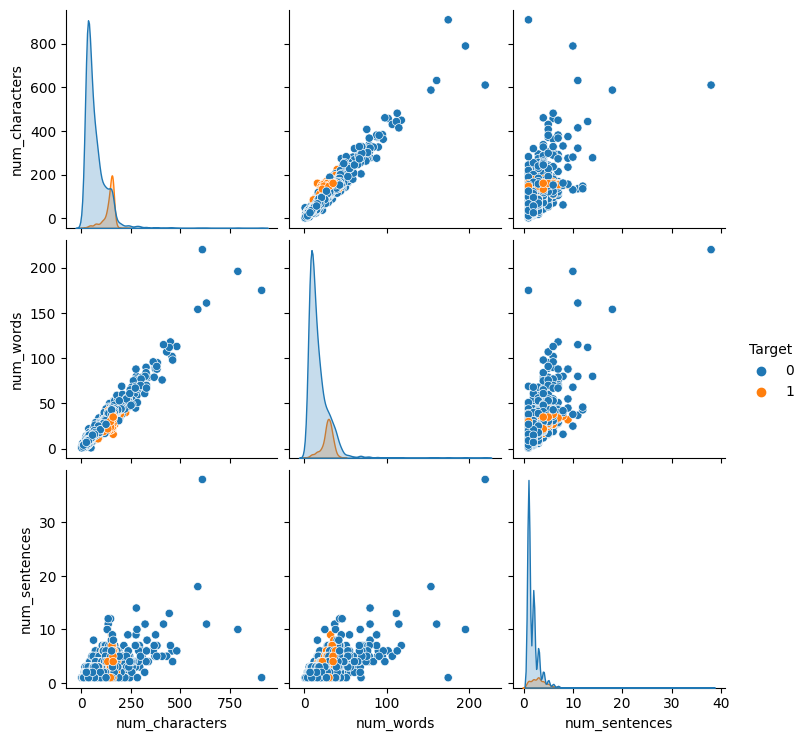

In [80]:
#relationship between num of words, num of sentences and num of characters
sns.pairplot(df,hue='Target')

In [84]:
df.dtypes

Target             int64
Text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

<Axes: >

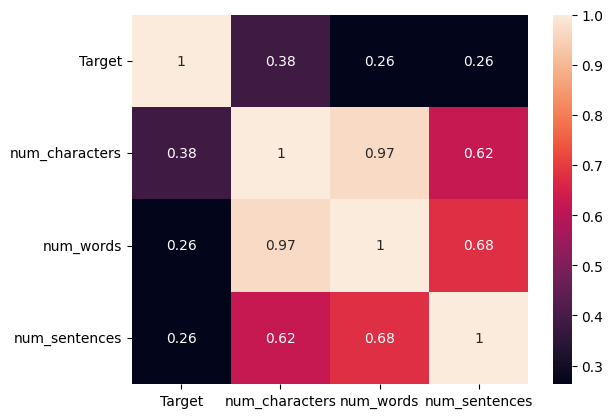

In [91]:
numeric_columns = df.drop(columns=['Text'])
sns.heatmap(numeric_columns.corr(),annot=True)

- 0.38 indicates that as the num of characters increase, so does the tendency of it being spam
- 0.62 indicates high correlation between num of sentences and num of characters
- 0.68 indicates high correlation between num of sentences and num of words
- 0.97 indicates high correlation between num of words and num of characters
- Based on the info, selecting num_characters as it also has high variance with target (any 3 of these could be selected)

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [98]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sunil
[nltk_data]     kadam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [99]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [105]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [114]:
def transform_text(text):
    text = text.lower() #lower case
    text = nltk.word_tokenize(text) #Tokenization
    
    #Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

transform_text('Is that seriously how you spell his name?')

'serious spell name'

In [113]:
df['Text'][20]

'Is that seriously how you spell his name?'

In [116]:
df['transformed_text'] = df['Text'].apply(transform_text)
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


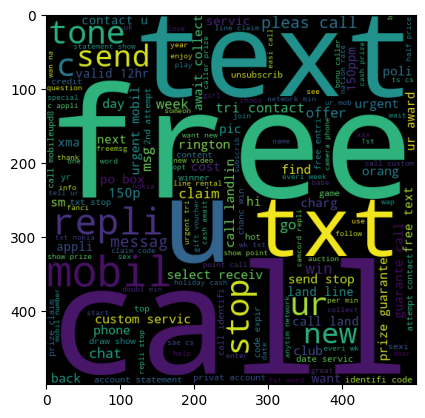

In [124]:
#word cloud for Spam
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

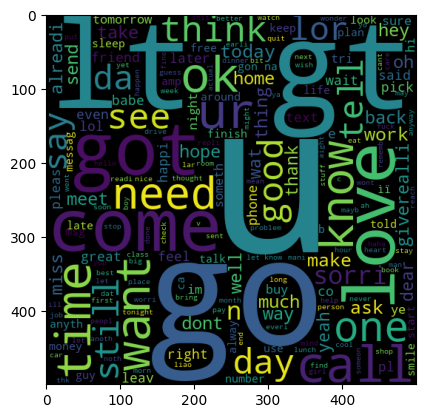

In [125]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [128]:
#extracting spam messages from transformed_text and coverting them into a list
#df[df['Target']==1]['transformed_text'].tolist()
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [130]:
len(spam_corpus)

9939

<function matplotlib.pyplot.show(close=None, block=None)>

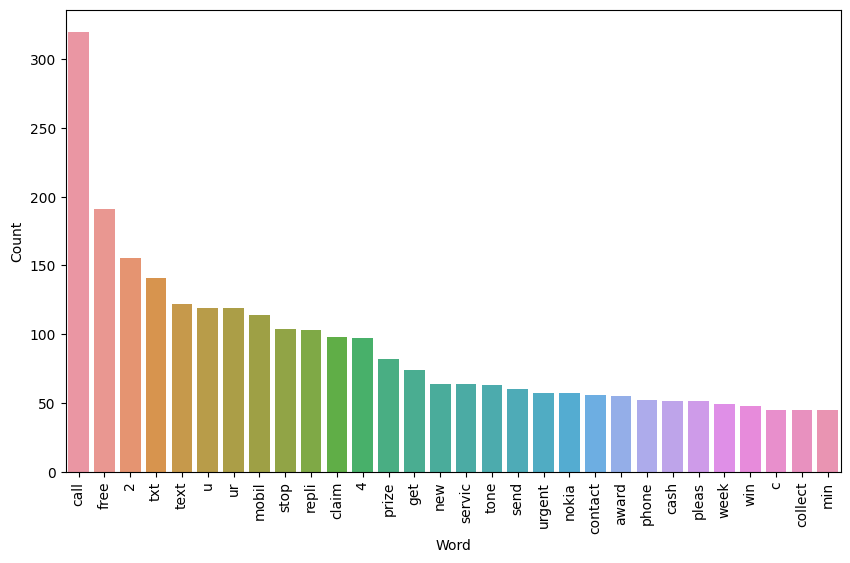

In [142]:
#finding 30 most common words and plotting it in a barplot
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words,columns=["Word", "Count"])
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Count", data=df_common_words)
plt.xticks(rotation="vertical")
plt.show

In [143]:
#common words in ham
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [144]:
len(ham_corpus)

35404

<function matplotlib.pyplot.show(close=None, block=None)>

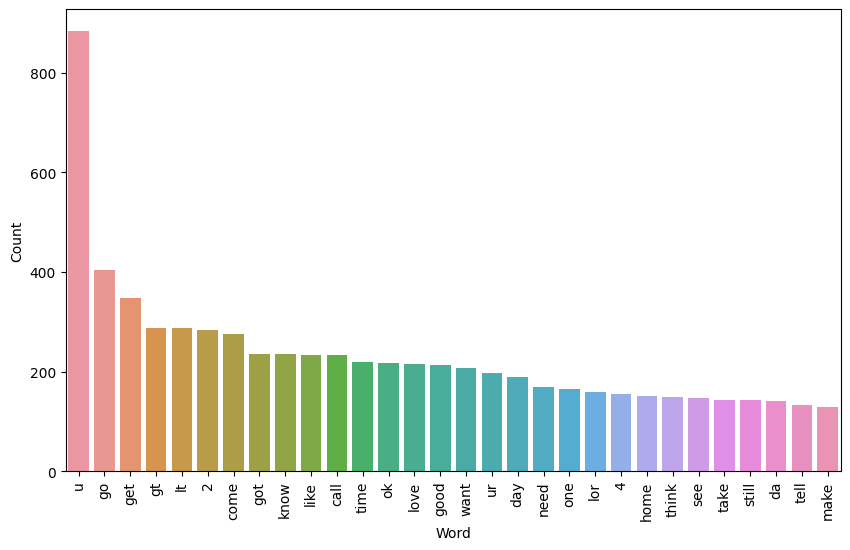

In [145]:
common_words_ham = Counter(ham_corpus).most_common(30)
df_common_words_ham = pd.DataFrame(common_words_ham,columns=["Word", "Count"])
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Count", data=df_common_words_ham)
plt.xticks(rotation="vertical")
plt.show

## 4. Model Building

Input is transformed_text which is in the form of text. Output is target which is in the form of numbers. Therefore vectorizing transformed_text

### Bag-of-words

In [182]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [149]:
X = cv.fit_transform(df['transformed_text']).toarray() #the function returns sparse array therefore we are using fit fucntion to return a dense array 
X.shape

(5169, 6708)

In [150]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [157]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [158]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [159]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### TFIDF

In [195]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray() #the function returns sparse array therefore we are using fit fucntion to return a dense array 
X2.shape

(5169, 3000)

In [189]:
#scaling
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X2 = scaler.fit_transform(X)

In [196]:
y2=df['Target'].values
y2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [198]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [199]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [200]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Choosing tfidf with mnb as it gives 100% precision. In this dataset precision is more important because as the data is imbalanced, accracy is not reliant

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [171]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [172]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [173]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [174]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [175]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [177]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [178]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


In [179]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [180]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.936170


C:\Users\sunil kadam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


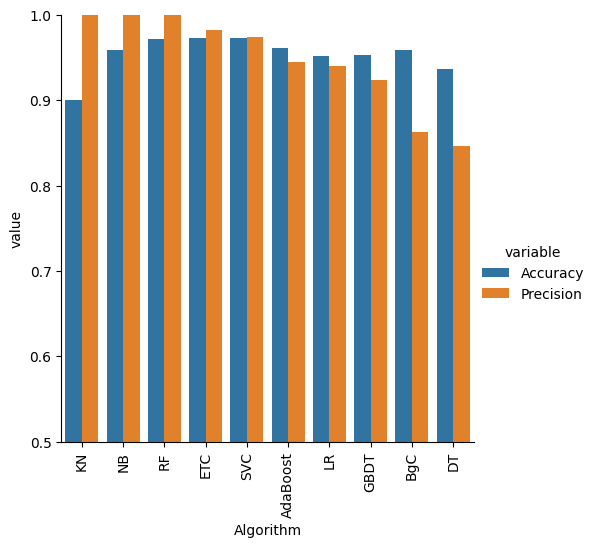

In [181]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()